In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

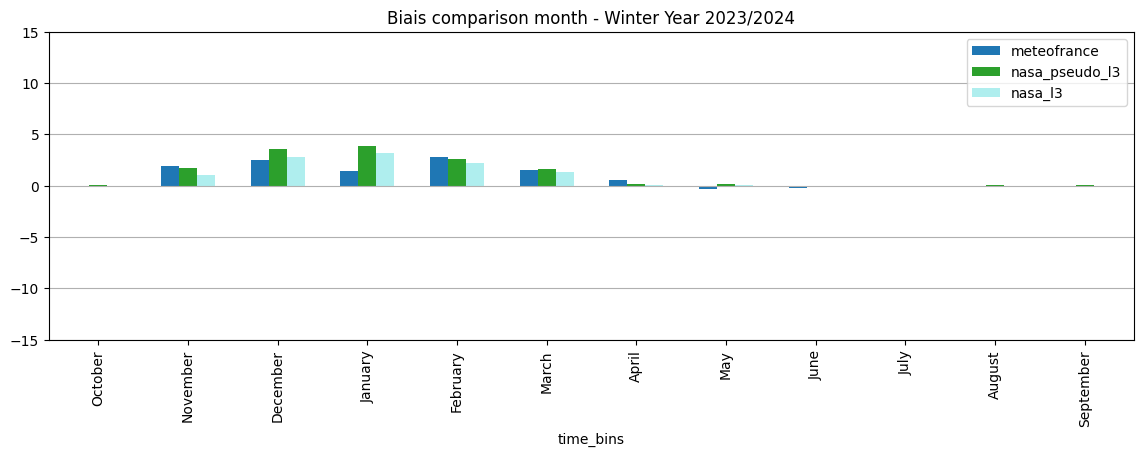

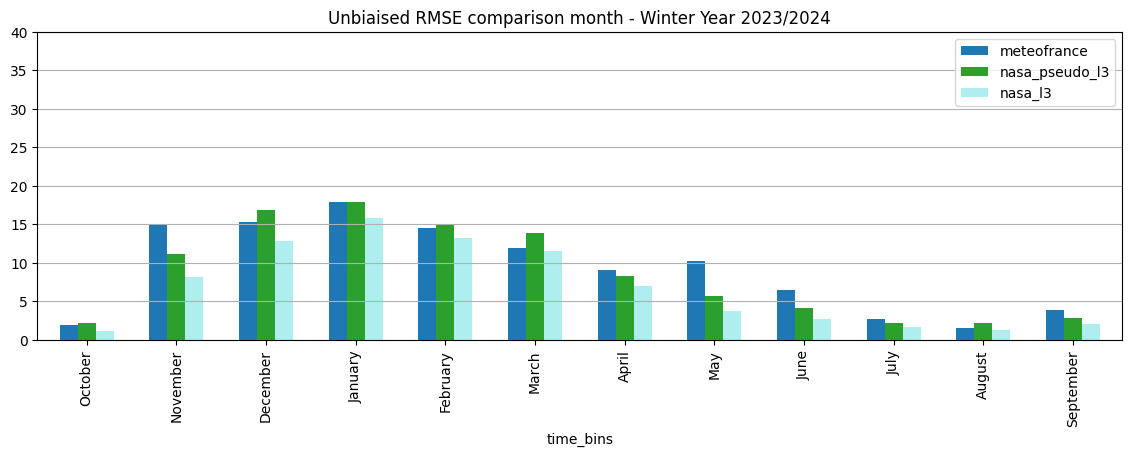

In [93]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)

In [ ]:
from evaluations.uncertainty import histograms_to_biais_rmse
reduced = mf_metrics_ds.sel(time='2024-01').groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(mf_metrics_ds)

In [ ]:
reduced.sel(slope_bins=10).sel(altitude_bins=4800)

<xarray.Dataset> Size: 272B
Dimensions:         (aspect_bins: 8)
Coordinates:
    slope_bins      int64 8B 10
  * aspect_bins     (aspect_bins) <U2 64B 'N' 'NE' 'E' 'SE' 'S' 'SW' 'W' 'NW'
    altitude_bins   int64 8B 2700
Data variables:
    biais           (aspect_bins) float64 64B 8.078 5.132 2.297 ... 5.276 7.342
    rmse            (aspect_bins) float64 64B 27.32 26.28 21.9 ... 25.29 27.34
    unbiaised_rmse  (aspect_bins) float64 64B 26.1 25.77 21.78 ... 24.74 26.33

/tmp/ipykernel_39247/2808416953.py:34: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)


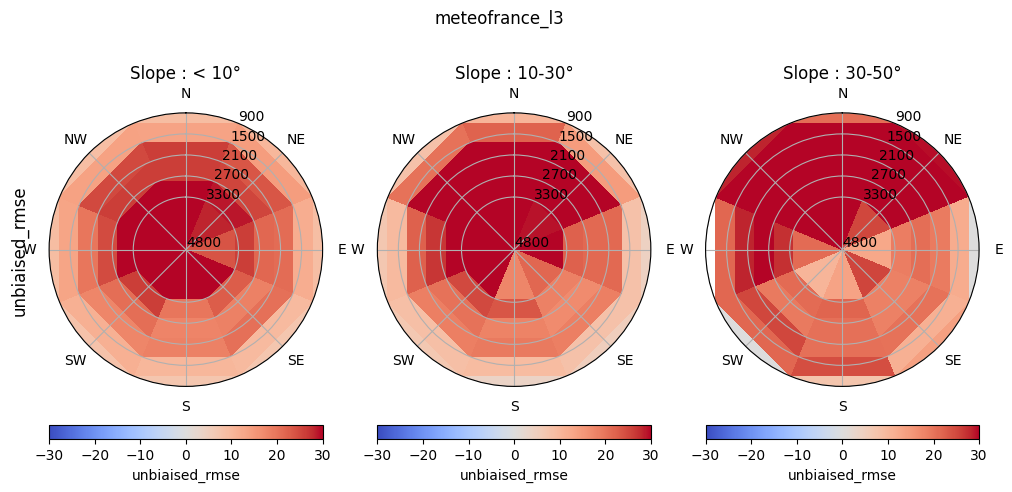

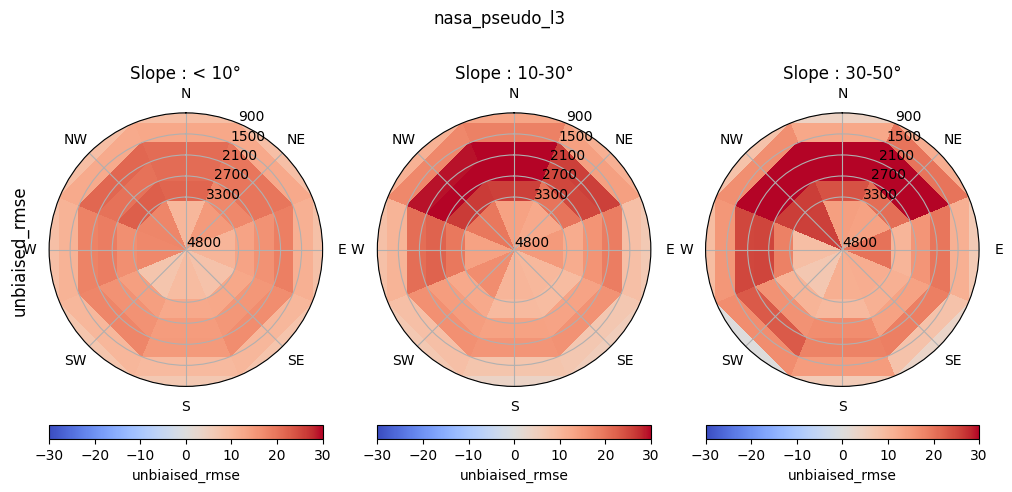

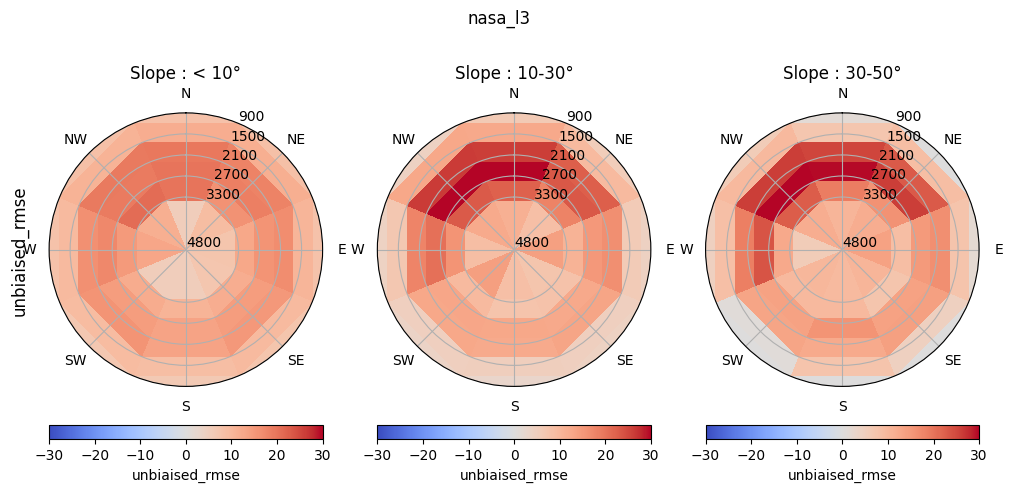

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(time='2024-01').sel(forest_mask=0)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(time='2024-01').sel(forest_mask=0)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(time='2024-01').sel(forest_mask=0)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'unbiaised_rmse'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

In [15]:
from evaluations.statistics_base import EvaluationVsHighResBase
EvaluationVsHighResBase.aspect_bins().bins

array([-22.5,  22.5,  67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5])

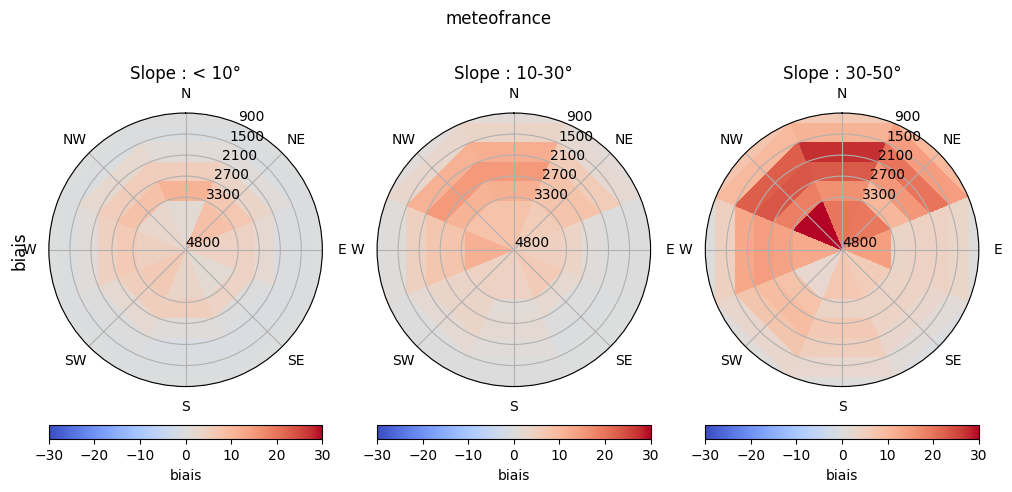

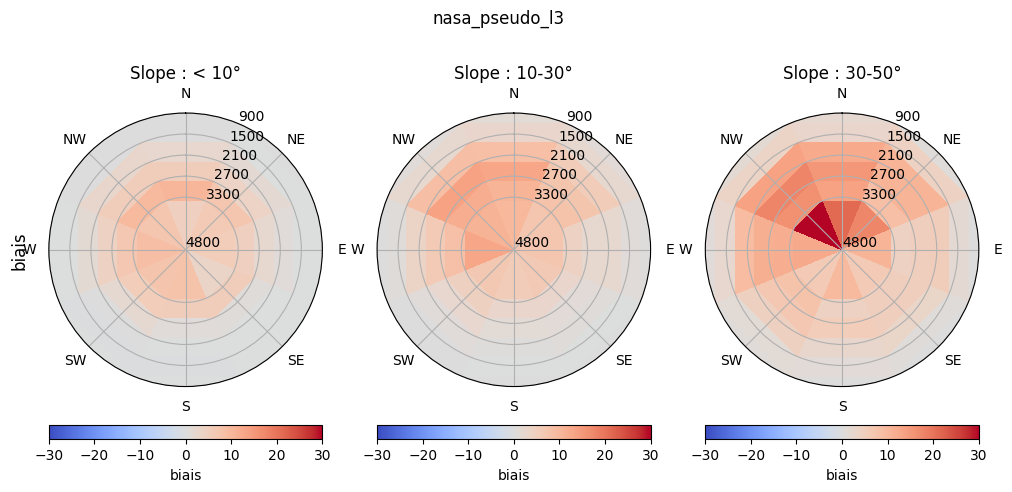

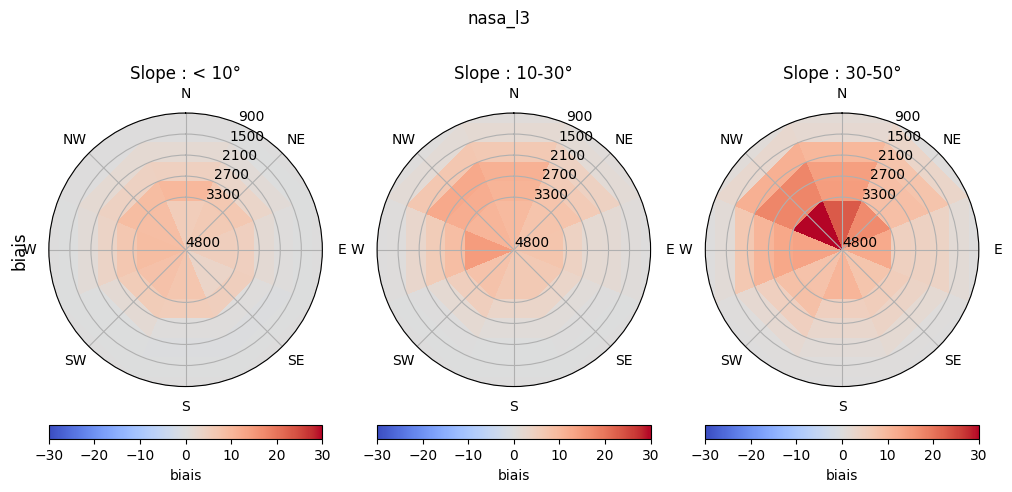

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

variable = 'biais'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)
        

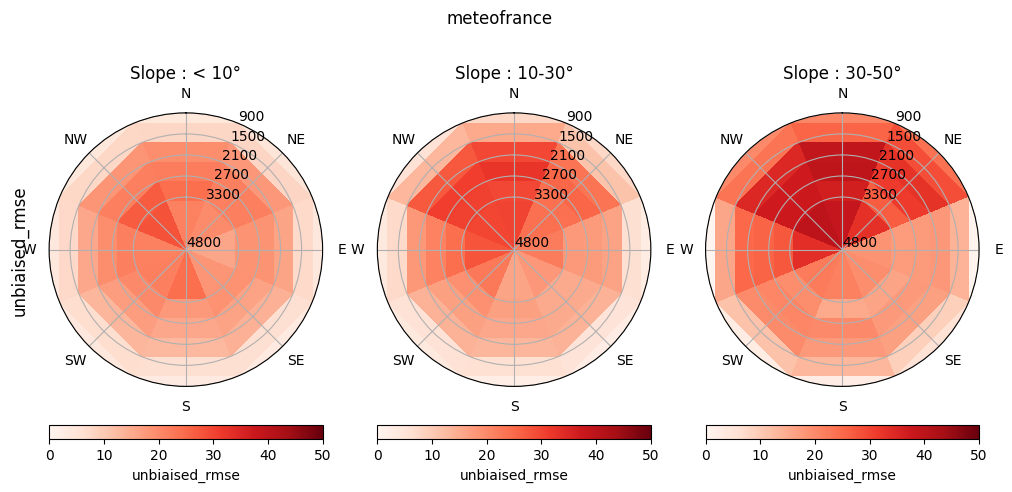

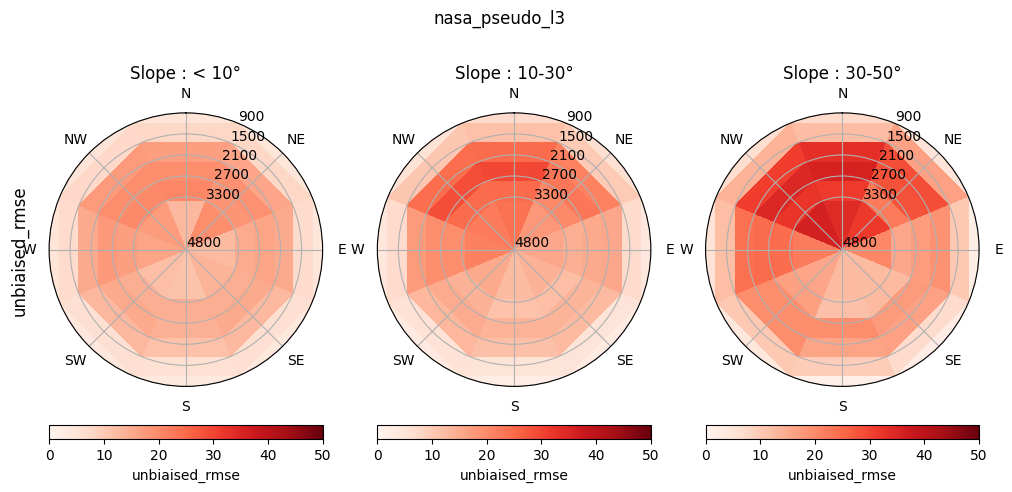

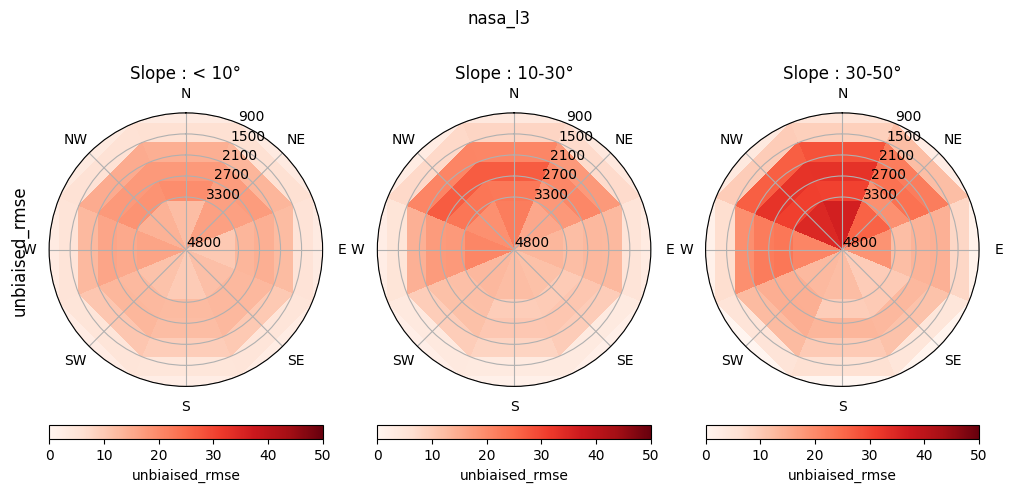

In [3]:
variable = 'unbiaised_rmse'
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'Reds',
                        vmin=0,
                        vmax=50)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

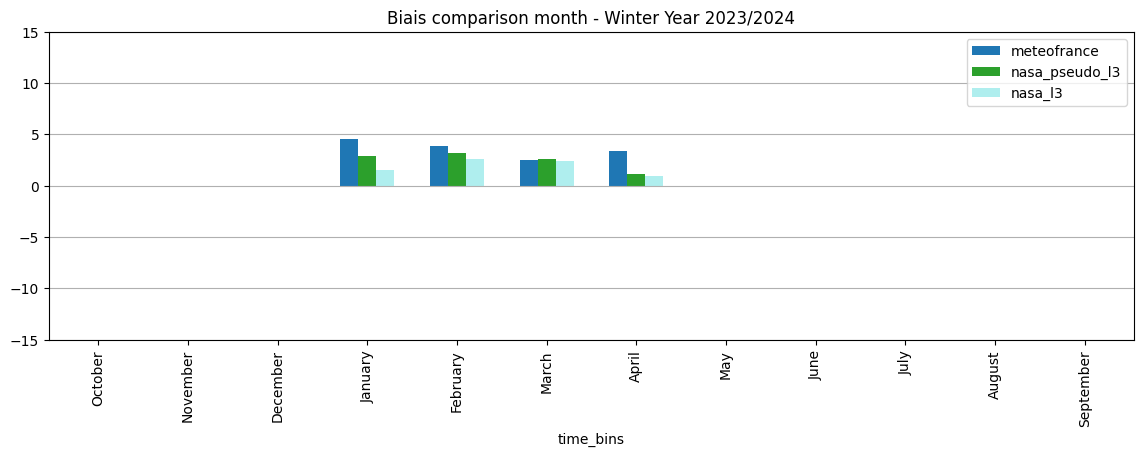

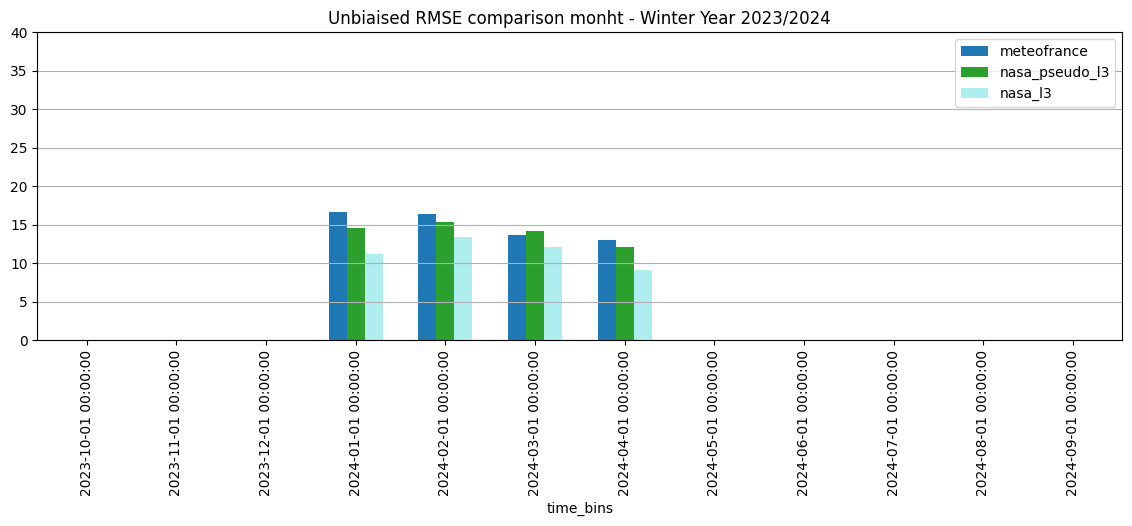

In [4]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='monht', winter_year=wy)

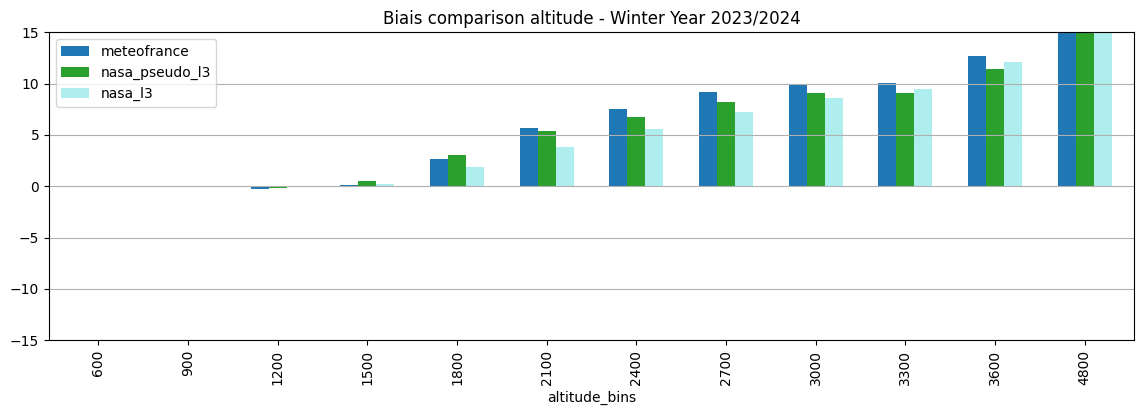

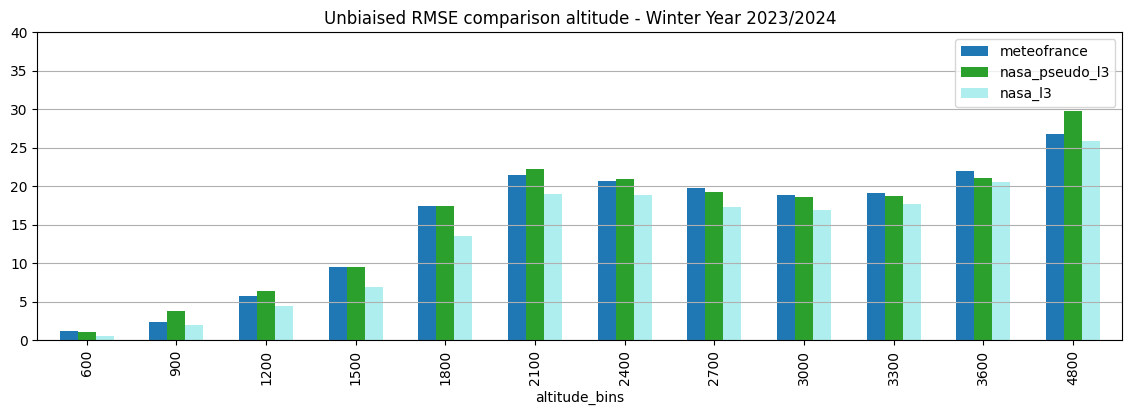

In [55]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)

In [80]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_boxplot(metrics_ds : xr.Dataset, ax: matplotlib.axes.Axes):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    data_to_plot = np.repeat(metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))
    # ax.hist(data_to_plot)
    # plt.show()
    return xr.Dataset(ax.boxplot(data_to_plot, notch=True,widths=3, showfliers=False))


{'whiskers': [<matplotlib.lines.Line2D at 0x7d7f43329550>,
 'caps': [<matplotlib.lines.Line2D at 0x7d7f4332ac90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d7f2ee92390>],
 'medians': [<matplotlib.lines.Line2D at 0x7d7f43328b00>],
 'fliers': [],
 'means': []}

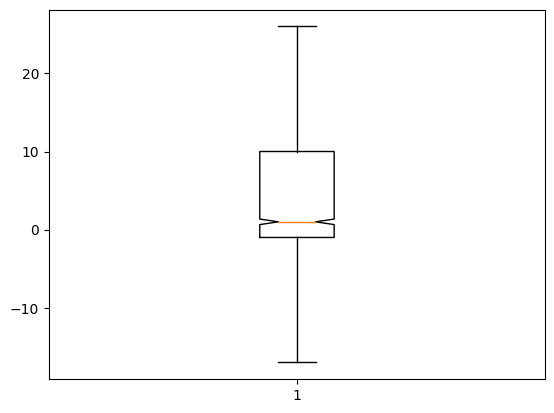

In [76]:
fig, ax = plt.subplots()
test_metrics_ds = mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).sel(ref_bins=slice(1, None)).isel(sensor_zenith_bins=1)
all_dims = list(test_metrics_ds.sizes.keys())
all_dims.remove('biais_bins')
metrics_squeezed = test_metrics_ds.sum(dim=all_dims)
data_to_plot = np.repeat(test_metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))
ax.boxplot(data_to_plot[::100], notch=True, vert=True, sym='ko',showfliers=False)


/home/imperatoren/miniconda3/envs/viirs_env/lib/python3.12/site-packages/xarray/core/indexes.py:822: RuntimeWarning: '<' not supported between instances of 'Line2D' and 'Line2D', sort order is undefined for incomparable objects.
  index = self.index.union(other.index)


<xarray.Dataset> Size: 336B
Dimensions:        (whiskers: 12, caps: 12, boxes: 6, medians: 6, fliers: 0,
                    means: 0, altitude_bins: 6)
Coordinates:
  * whiskers       (whiskers) object 96B Line2D(_nolegend_) ... Line2D(_noleg...
  * caps           (caps) object 96B Line2D(_nolegend_) ... Line2D(_nolegend_)
  * boxes          (boxes) object 48B Line2D(_child0) ... Line2D(_child30)
  * medians        (medians) object 48B Line2D(_nolegend_) ... Line2D(_nolege...
  * fliers         (fliers) float64 0B 
  * means          (means) float64 0B 
  * altitude_bins  (altitude_bins) int64 48B 900 1500 2100 2700 3300 4800
Data variables:
    *empty*

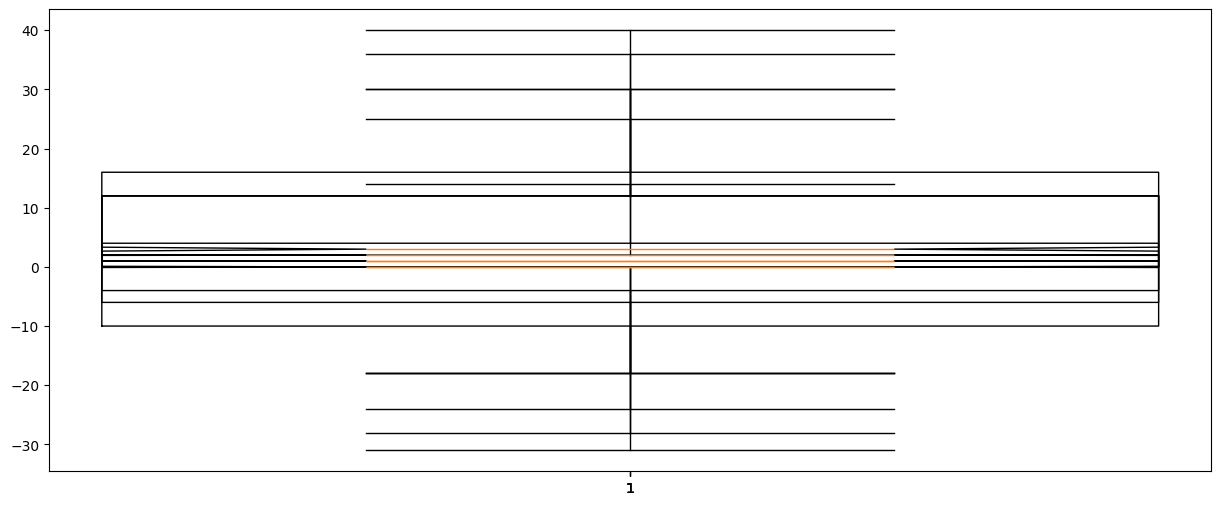

In [81]:
fig, ax = plt.subplots(figsize=(15,6))

mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).sel(ref_bins=slice(1, None)).groupby('altitude_bins').map(histograms_to_boxplot, ax = ax)
# ax.set_ylim([-5,5])

In [19]:
mf_metrics_ds

<xarray.Dataset> Size: 3GB
Dimensions:             (biais_bins: 201, ref_bins: 4, sensor_zenith_bins: 6,
                         forest_mask: 2, slope_bins: 4, aspect_bins: 8,
                         altitude_bins: 6, time: 217)
Coordinates:
  * biais_bins          (biais_bins) int64 2kB -100 -99 -98 -97 ... 97 98 99 100
  * ref_bins            (ref_bins) int64 32B 0 99 100 205
  * sensor_zenith_bins  (sensor_zenith_bins) int64 48B 15 30 45 60 75 255
  * forest_mask         (forest_mask) float32 8B 0.0 1.0
  * slope_bins          (slope_bins) int64 32B 10 30 50 90
  * aspect_bins         (aspect_bins) <U2 64B 'N' 'NE' 'E' ... 'SW' 'W' 'NW'
  * altitude_bins       (altitude_bins) int64 48B 900 1500 2100 2700 3300 4800
  * time                (time) datetime64[ns] 2kB 2023-11-01 ... 2024-07-19
Data variables:
    n_occurrences       (time, biais_bins, ref_bins, sensor_zenith_bins, forest_mask, slope_bins, aspect_bins, altitude_bins) float64 3GB ...

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


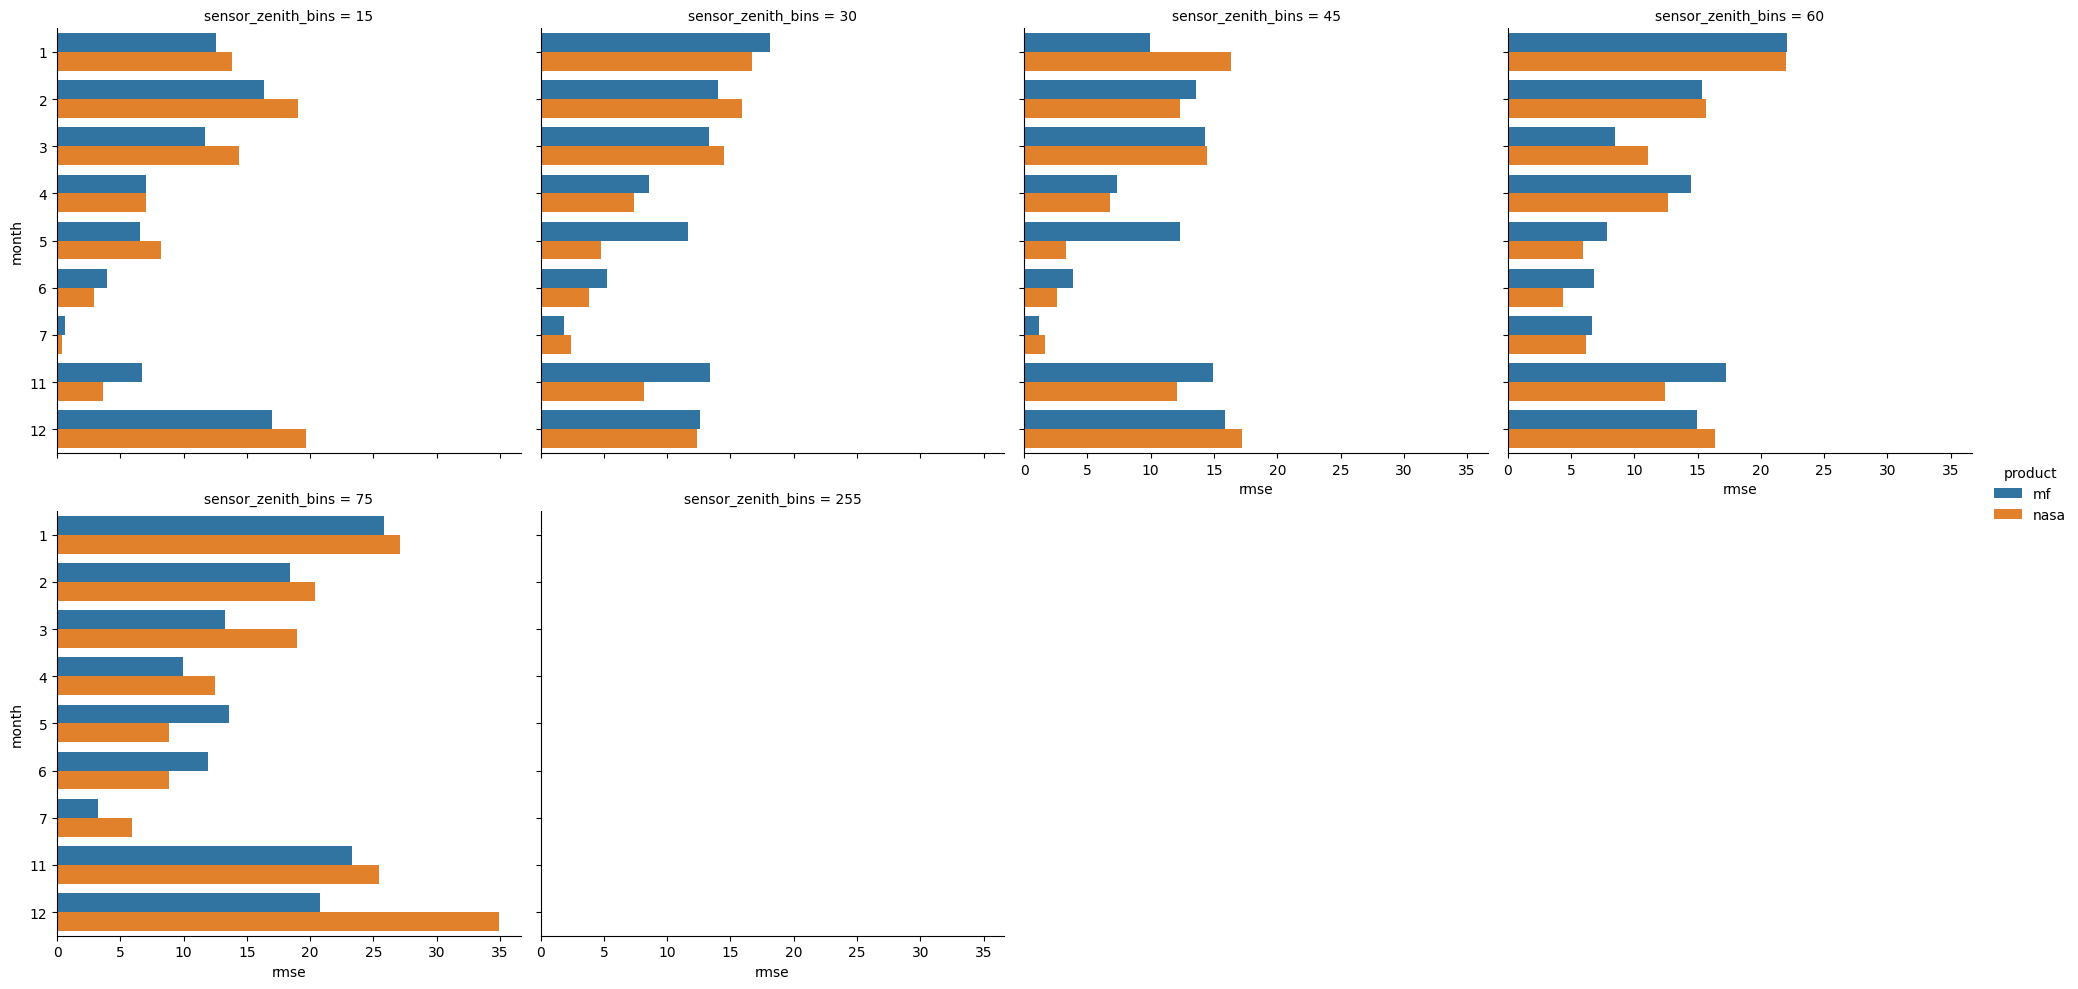

In [27]:
import pandas as pd
import seaborn as sns
from evaluations.uncertainty import postprocess_uncertainty_analysis, histograms_to_biais_rmse
reduced_mf = mf_metrics_ds.groupby(['time.month', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
# reduced_nasa = nasa_l3_metrics_ds.sel(time='2024-01').groupby(['forest_mask', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
reduced_nasa = nasa_pseudo_l3_metrics_ds.groupby(['time.month', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
reduced = xr.concat([reduced_mf, reduced_nasa], pd.Index(["mf", "nasa"], name="product"))
reduced_df = reduced.to_dataframe()
sns.catplot(reduced_df,x='rmse', y='month',hue='product',col='sensor_zenith_bins', kind='bar',col_wrap = 4,orient = 'h')

In [ ]:
def histograms_to_distribution(metrics_ds : xr.Dataset):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    return xr.Dataset({'biais':xr.DataArray(data=np.repeat(metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64)), dims='new_dim')})

histograms_to_distribution(mf_metrics_ds.sel(time='2023').sel(sensor_zenith_bins=15))

<xarray.Dataset> Size: 1MB
Dimensions:  (biais: 176651)
Coordinates:
  * biais    (biais) int64 1MB -100 -100 -100 -100 -100 ... 100 100 100 100 100
Data variables:
    *empty*

In [42]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_distribution(metrics_ds : xr.Dataset):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    return xr.Dataset({'biais':np.repeat(metrics_ds.coords['biais_bins'].values, metrics_squeezed['n_occurrences'].values.astype(np.int64))})

reduced_mf = mf_metrics_ds.sel(time='2023').groupby(['time.month', 'sensor_zenith_bins']).map(histograms_to_distribution)
# reduced_nasa = nasa_l3_metrics_ds.sel(time='2024-01').groupby(['forest_mask', 'sensor_zenith_bins']).map(histograms_to_biais_rmse)
reduced_nasa = nasa_pseudo_l3_metrics_ds.sel(time='2023').groupby(['time.month', 'sensor_zenith_bins']).map(histograms_to_distribution)
reduced = xr.concat([reduced_mf, reduced_nasa], pd.Index(["mf", "nasa"], name="product"))
reduced_df = reduced.to_dataframe()
sns.catplot(reduced_df,x='rmse', y='month',hue='product',col='sensor_zenith_bins', kind='box',col_wrap = 4,orient = 'h')

ValueError: cannot reindex or align along dimension 'biais' because the (pandas) index has duplicate values

In [39]:
reduced_mf

<xarray.Dataset> Size: 352B
Dimensions:             (month: 2, sensor_zenith_bins: 6)
Coordinates:
  * month               (month) int64 16B 11 12
  * sensor_zenith_bins  (sensor_zenith_bins) int64 48B 15 30 45 60 75 255
Data variables:
    biais               (month, sensor_zenith_bins) float64 96B 0.6477 ... nan
    rmse                (month, sensor_zenith_bins) float64 96B 6.704 ... nan
    unbiaised_rmse      (month, sensor_zenith_bins) float64 96B 6.673 ... nan